In [47]:
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
img = cv2.imread('./test_image/test1.jpg')


In [49]:
img.shape

(2048, 1523, 3)

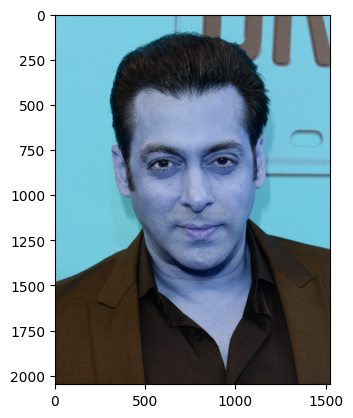

In [50]:
plt.imshow(img)

In [51]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(2048, 1523)

In [52]:
gray

array([[202, 202, 202, ..., 202, 202, 202],
       [202, 202, 202, ..., 202, 202, 202],
       [202, 202, 202, ..., 202, 202, 202],
       ...,
       [ 32,  33,  34, ...,  43,  42,  40],
       [ 33,  35,  36, ...,  42,  40,  39],
       [ 34,  37,  39, ...,  43,  42,  41]], dtype=uint8)

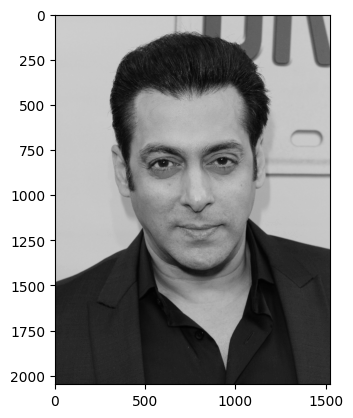

In [53]:
plt.imshow(gray, cmap='gray')

In [54]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[319, 475, 901, 901]])

In [55]:
(x,y,w,h) = faces[0]
x,y,w,h

(319, 475, 901, 901)

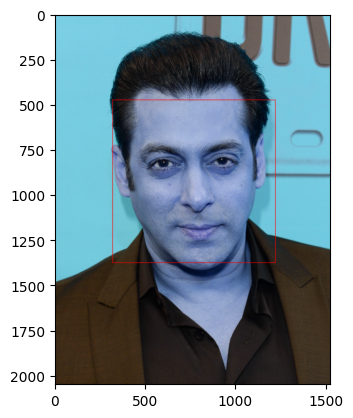

In [56]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

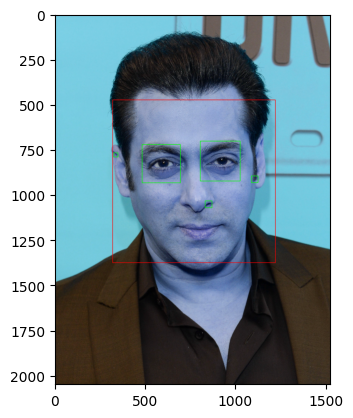

In [57]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

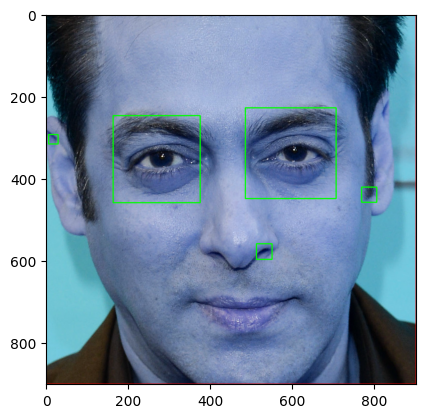

In [58]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

# Full Image to Cropped Image Function

In [59]:
def get_cropped_image_if_2_eyes(image_path):
   
    img = cv2.imread(image_path)
    gray = None
    
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

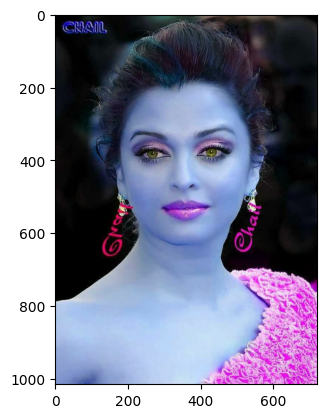

In [60]:
original_image = cv2.imread('./test_image/test2.jpg')
plt.imshow(original_image)

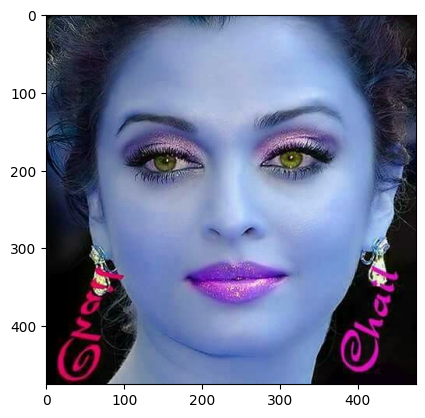

In [61]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/test2.jpg')
plt.imshow(cropped_image)

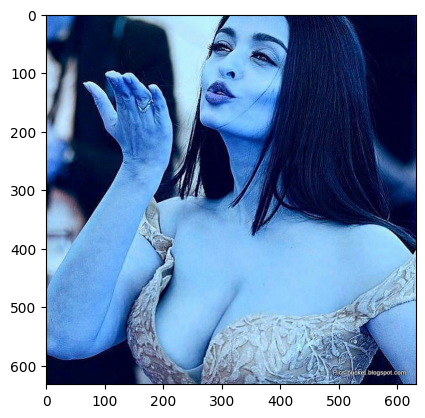

In [62]:
not_proper = cv2.imread('./test_image/test3.jpg')
plt.imshow(not_proper)

In [63]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/test2.jpg')
print(cropped_image)

[[[ 4  9  8]
  [ 3  9  8]
  [ 2  8  7]
  ...
  [14 12 11]
  [14 12 11]
  [14 12 11]]

 [[ 0  4  3]
  [ 0  6  5]
  [ 2  8  7]
  ...
  [14 12 11]
  [14 12 11]
  [14 12 11]]

 [[ 0  1  0]
  [ 0  2  1]
  [ 0  5  4]
  ...
  [14 12 11]
  [14 12 11]
  [14 12 11]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 8  2  7]
  [ 8  2  7]
  [ 8  2  7]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 8  2  7]
  [ 8  2  7]
  [ 8  2  7]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 8  2  7]
  [ 8  2  7]
  [ 8  2  7]]]


In [64]:
path_of_data = "./images_dataset/"
path_of_cropped = "./images_dataset/cropped/"

In [65]:
import os
img_dirs = []

for i in os.scandir(path_of_data):
    if i.is_dir():
        img_dirs.append(i.path)

In [66]:
img_dirs

['./images_dataset/Aamir_Khan',
 './images_dataset/Aishwarya_Rai',
 './images_dataset/Ajay_Devgn',
 './images_dataset/Akshay_Kumar',
 './images_dataset/Amitabh_Bachchan',
 './images_dataset/Anil_Kapoor',
 './images_dataset/Bobby_Deol',
 './images_dataset/cropped',
 './images_dataset/Deepika_Padukone',
 './images_dataset/Hrithik_Roshan',
 './images_dataset/John_Abraham',
 './images_dataset/Kareena_Kapoor',
 './images_dataset/Kartik_Aaryan',
 './images_dataset/Katrina_Kaif',
 './images_dataset/Kriti_Sanon',
 './images_dataset/Madhuri_Dixit',
 './images_dataset/Manoj_Bajpayee',
 './images_dataset/Priyanka_Chopra',
 './images_dataset/Ranveer_Singh',
 './images_dataset/Salman_Khan',
 './images_dataset/Sanjay_Dutt',
 './images_dataset/Shahid_Kapoor',
 './images_dataset/Shah_Rukh_Khan',
 './images_dataset/Shraddha_Kapoor',
 './images_dataset/Tiger_Shroff',
 './images_dataset/Varun_Dhawan',
 './images_dataset/Vicky_Kaushal',
 './images_dataset/Vidya_Balan',
 './images_dataset/Vivek_Oberoi',
 '

In [67]:
import shutil
if os.path.exists(path_of_cropped):
    shutil.rmtree(path_of_cropped)
os.mkdir(path_of_cropped)

# Original Images -> Cropped Images

In [68]:
cropped_image_dirs = []
celebrity_file_names_dict ={}

for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_of_cropped + celebrity_name
            
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                
                cropped_image_dirs.append(cropped_folder)
                
                print("Folder Created : ",cropped_folder)    
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   
                

Aamir_Khan
Folder Created :  ./images_dataset/cropped/Aamir_Khan
Aishwarya_Rai
Folder Created :  ./images_dataset/cropped/Aishwarya_Rai
Ajay_Devgn
Folder Created :  ./images_dataset/cropped/Ajay_Devgn
Akshay_Kumar
Folder Created :  ./images_dataset/cropped/Akshay_Kumar
Amitabh_Bachchan
Folder Created :  ./images_dataset/cropped/Amitabh_Bachchan
Anil_Kapoor
Folder Created :  ./images_dataset/cropped/Anil_Kapoor
Bobby_Deol
Folder Created :  ./images_dataset/cropped/Bobby_Deol
cropped
Deepika_Padukone
Folder Created :  ./images_dataset/cropped/Deepika_Padukone
Hrithik_Roshan
Folder Created :  ./images_dataset/cropped/Hrithik_Roshan
John_Abraham
Folder Created :  ./images_dataset/cropped/John_Abraham
Kareena_Kapoor
Folder Created :  ./images_dataset/cropped/Kareena_Kapoor
Kartik_Aaryan
Folder Created :  ./images_dataset/cropped/Kartik_Aaryan
Katrina_Kaif
Folder Created :  ./images_dataset/cropped/Katrina_Kaif
Kriti_Sanon
Folder Created :  ./images_dataset/cropped/Kriti_Sanon
Madhuri_Dixit


  # Wavelet Transformation

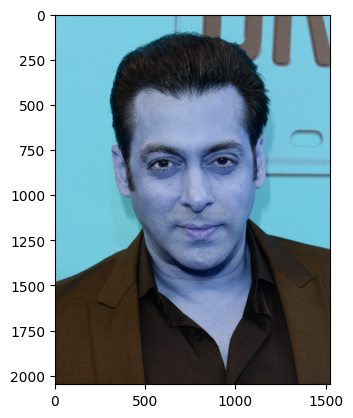

In [69]:
img = cv2.imread('./test_image/test1.jpg')

plt.imshow(img)

In [70]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

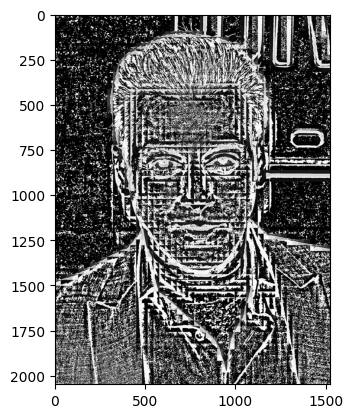

In [71]:
im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [72]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Aamir_Khan': ['./images_dataset/cropped/Aamir_Khan\\Aamir_Khan1.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan10.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan100.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan101.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan102.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan11.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan12.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan13.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan14.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan15.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan16.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan17.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan18.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan19.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan2.png',
  './images_dataset/cropped/Aamir_Khan\\Aamir_Khan20.png',
  './images_dataset/cropped/Aamir_Khan\\A

In [73]:
class_dict = {}
count = 0

for name in celebrity_file_names_dict.keys():
    class_dict[name] = count
    count = count + 1
class_dict

{'Aamir_Khan': 0,
 'Aishwarya_Rai': 1,
 'Ajay_Devgn': 2,
 'Akshay_Kumar': 3,
 'Amitabh_Bachchan': 4,
 'Anil_Kapoor': 5,
 'Bobby_Deol': 6,
 'Deepika_Padukone': 7,
 'Hrithik_Roshan': 8,
 'John_Abraham': 9,
 'Kareena_Kapoor': 10,
 'Kartik_Aaryan': 11,
 'Katrina_Kaif': 12,
 'Kriti_Sanon': 13,
 'Madhuri_Dixit': 14,
 'Manoj_Bajpayee': 15,
 'Priyanka_Chopra': 16,
 'Ranveer_Singh': 17,
 'Salman_Khan': 18,
 'Sanjay_Dutt': 19,
 'Shahid_Kapoor': 20,
 'Shah_Rukh_Khan': 21,
 'Shraddha_Kapoor': 22,
 'Tiger_Shroff': 23,
 'Varun_Dhawan': 24,
 'Vicky_Kaushal': 25,
 'Vidya_Balan': 26,
 'Vivek_Oberoi': 27,
 'Yami_Gautam': 28,
 'Zareen_Khan': 29}

In [74]:
x,y = [],[]

for celebrity_name,training_files in celebrity_file_names_dict.items():
    
    for taining_image in training_files:
        img = cv2.imread(taining_image)
        if img is None:
            continue
            
        scalled_raw_img = cv2.resize(img,(32,32))  #resize the image
        
        img_har = w2d(img,'db1',5)  # raw to wavelet
        
        scalled_img_har = cv2.resize(img_har,(32,32))
        
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [75]:
len(x)

2794

### List to n-d Array 

In [76]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(2794, 4096)

In [77]:
x[0]

array([14., 13., 14., ...,  9.,  1.,  5.])

# Taining the Model

In [78]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

1. SVM

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [80]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

In [81]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [82]:
pipe.score(x_test,y_test)

0.4576877234803337

In [83]:
len(y_train)

1955

In [84]:
len(x_test)

839

In [85]:
class_dict

{'Aamir_Khan': 0,
 'Aishwarya_Rai': 1,
 'Ajay_Devgn': 2,
 'Akshay_Kumar': 3,
 'Amitabh_Bachchan': 4,
 'Anil_Kapoor': 5,
 'Bobby_Deol': 6,
 'Deepika_Padukone': 7,
 'Hrithik_Roshan': 8,
 'John_Abraham': 9,
 'Kareena_Kapoor': 10,
 'Kartik_Aaryan': 11,
 'Katrina_Kaif': 12,
 'Kriti_Sanon': 13,
 'Madhuri_Dixit': 14,
 'Manoj_Bajpayee': 15,
 'Priyanka_Chopra': 16,
 'Ranveer_Singh': 17,
 'Salman_Khan': 18,
 'Sanjay_Dutt': 19,
 'Shahid_Kapoor': 20,
 'Shah_Rukh_Khan': 21,
 'Shraddha_Kapoor': 22,
 'Tiger_Shroff': 23,
 'Varun_Dhawan': 24,
 'Vicky_Kaushal': 25,
 'Vidya_Balan': 26,
 'Vivek_Oberoi': 27,
 'Yami_Gautam': 28,
 'Zareen_Khan': 29}

In [86]:
from sklearn.metrics import classification_report

y_pred = pipe.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.13      0.29      0.18        28
           1       0.43      0.57      0.49        44
           2       0.50      0.22      0.31        18
           3       0.69      0.43      0.53        21
           4       0.50      0.47      0.49        19
           5       0.75      0.63      0.69        19
           6       0.50      0.12      0.19        17
           7       0.50      0.52      0.51        46
           8       0.43      0.22      0.29        27
           9       0.34      0.58      0.43        19
          10       0.53      0.43      0.47        42
          11       0.50      0.39      0.44        31
          12       0.35      0.58      0.43        43
          13       0.73      0.57      0.64        42
          14       0.38      0.62      0.47        32
          15       0.42      0.40      0.41        20
          16       0.45      0.52      0.48        27
          17       0.44    

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0,  0,  0,  0,  0,  1,  2,  1,  0,  1,  0,  0,  0,  2,
         1,  1,  2,  1,  1,  1,  0,  0,  1,  4,  0,  1,  0,  0],
       [ 1, 25,  0,  0,  0,  0,  1,  5,  0,  0,  0,  0,  3,  0,  4,  0,
         0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  1,  0,  1,  0],
       [ 3,  1,  4,  1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,
         1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 5,  0,  1,  9,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,
         0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  9,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
         1,  0,  1,  0,  2,  1,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0, 12,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  2,  0,  0,  1,  1,  0,  0,  0,  0,  2,
         0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  1,  0,  0, 24,  

Text(95.72222222222221, 0.5, 'Truth')

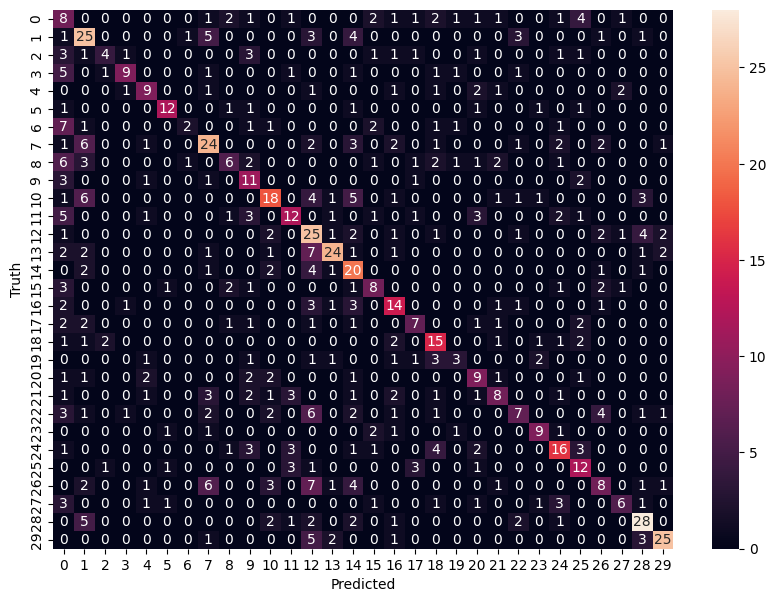

In [88]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
class_dict

{'Aamir_Khan': 0,
 'Aishwarya_Rai': 1,
 'Ajay_Devgn': 2,
 'Akshay_Kumar': 3,
 'Amitabh_Bachchan': 4,
 'Anil_Kapoor': 5,
 'Bobby_Deol': 6,
 'Deepika_Padukone': 7,
 'Hrithik_Roshan': 8,
 'John_Abraham': 9,
 'Kareena_Kapoor': 10,
 'Kartik_Aaryan': 11,
 'Katrina_Kaif': 12,
 'Kriti_Sanon': 13,
 'Madhuri_Dixit': 14,
 'Manoj_Bajpayee': 15,
 'Priyanka_Chopra': 16,
 'Ranveer_Singh': 17,
 'Salman_Khan': 18,
 'Sanjay_Dutt': 19,
 'Shahid_Kapoor': 20,
 'Shah_Rukh_Khan': 21,
 'Shraddha_Kapoor': 22,
 'Tiger_Shroff': 23,
 'Varun_Dhawan': 24,
 'Vicky_Kaushal': 25,
 'Vidya_Balan': 26,
 'Vivek_Oberoi': 27,
 'Yami_Gautam': 28,
 'Zareen_Khan': 29}

# GridSearch

In [90]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [91]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [92]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.487980,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.188235,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.425575,{'logisticregression__C': 1}


In [93]:
"Accuracy of SVM : ",best_estimators['svm'].score(x_test,y_test)*100 

('Accuracy of SVM : ', 50.53635280095352)

In [94]:
bst_clf = best_estimators['svm']

In [95]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0,  0,  0,  0,  0,  1,  2,  1,  0,  1,  0,  0,  0,  2,
         1,  1,  2,  1,  1,  1,  0,  0,  1,  4,  0,  1,  0,  0],
       [ 1, 25,  0,  0,  0,  0,  1,  5,  0,  0,  0,  0,  3,  0,  4,  0,
         0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  1,  0,  1,  0],
       [ 3,  1,  4,  1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,
         1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 5,  0,  1,  9,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,
         0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  9,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
         1,  0,  1,  0,  2,  1,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0, 12,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  2,  0,  0,  1,  1,  0,  0,  0,  0,  2,
         0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  1,  0,  0, 24,  

Text(95.72222222222221, 0.5, 'Truth')

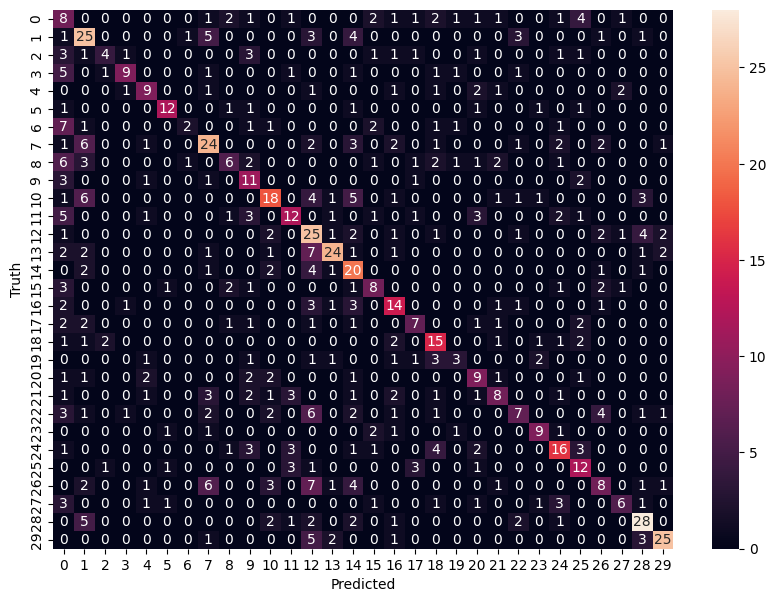

In [96]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
class_dict

{'Aamir_Khan': 0,
 'Aishwarya_Rai': 1,
 'Ajay_Devgn': 2,
 'Akshay_Kumar': 3,
 'Amitabh_Bachchan': 4,
 'Anil_Kapoor': 5,
 'Bobby_Deol': 6,
 'Deepika_Padukone': 7,
 'Hrithik_Roshan': 8,
 'John_Abraham': 9,
 'Kareena_Kapoor': 10,
 'Kartik_Aaryan': 11,
 'Katrina_Kaif': 12,
 'Kriti_Sanon': 13,
 'Madhuri_Dixit': 14,
 'Manoj_Bajpayee': 15,
 'Priyanka_Chopra': 16,
 'Ranveer_Singh': 17,
 'Salman_Khan': 18,
 'Sanjay_Dutt': 19,
 'Shahid_Kapoor': 20,
 'Shah_Rukh_Khan': 21,
 'Shraddha_Kapoor': 22,
 'Tiger_Shroff': 23,
 'Varun_Dhawan': 24,
 'Vicky_Kaushal': 25,
 'Vidya_Balan': 26,
 'Vivek_Oberoi': 27,
 'Yami_Gautam': 28,
 'Zareen_Khan': 29}

# Save Trained Model

In [98]:
%pip install joblib
import joblib 

joblib.dump(bst_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Save Class Dictionary

In [99]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))